In [1]:
# load the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data

In [4]:
data=pd.read_csv(r"Oasis infobytes\Advertising.csv")

In [5]:
# lets analyse the data

In [6]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
data=data.drop(["Unnamed: 0"],axis=1)

In [8]:
# lests check the null value present in the data

In [9]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
#lets check the shape of the data

In [11]:
data.shape

(200, 4)

In [12]:
#lets describe the data

In [13]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [14]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
# lets find the correlation of the data

<Axes: >

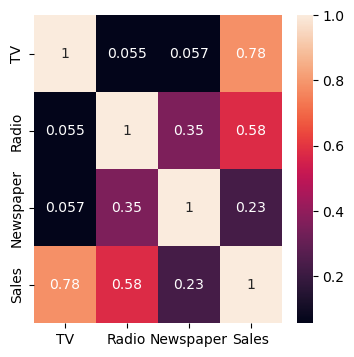

In [16]:
plt.rcParams["figure.figsize"]=(4,4)
feature=data.corr().index
sns.heatmap(data[feature].corr(),annot=True)

In [17]:
# lets plot the histogram

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

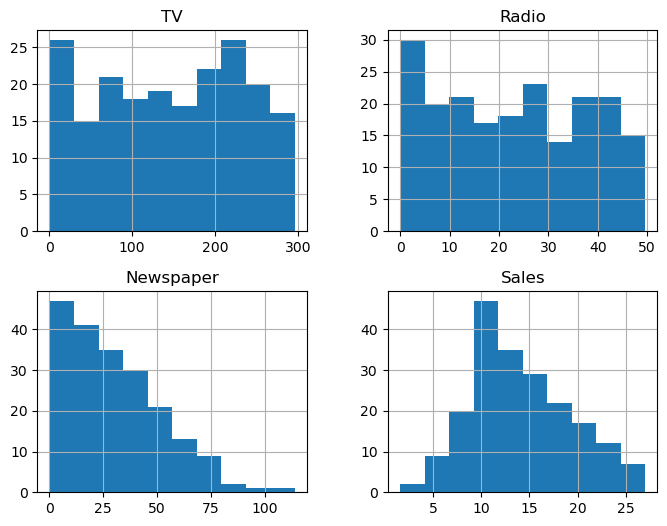

In [18]:
plt.rcParams["figure.figsize"]=(8,6)
data.hist()

In [19]:
# lets plot scatter plot  to view the relationship between columns

In [20]:
plt.rcParams["figure.figsize"]=(10,8)

<Axes: xlabel='Newspaper', ylabel='Sales'>

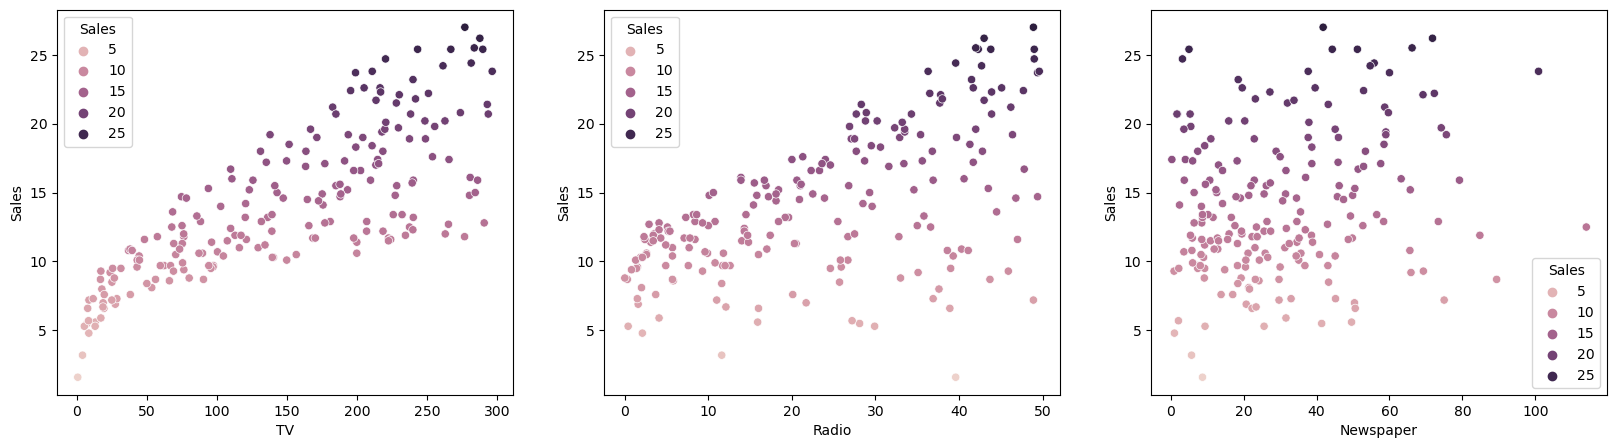

In [21]:
plt.rcParams["figure.figsize"]=(20,5)
plt.subplot(1,3,1)
sns.scatterplot(x=data["TV"],y=data["Sales"],hue=data["Sales"])
plt.subplot(1,3,2)
sns.scatterplot(x=data["Radio"],y=data["Sales"],hue=data["Sales"])
plt.subplot(1,3,3)
sns.scatterplot(x=data["Newspaper"],y=data["Sales"],hue=data["Sales"])

In [22]:
# as we see there is strong relationship between Tv ad and sales while others have mix type relations

In [23]:
# now lets plot distribution graph 

C:\Users\PRAFULL\AppData\Local\Temp\ipykernel_18148\604264494.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data[i])


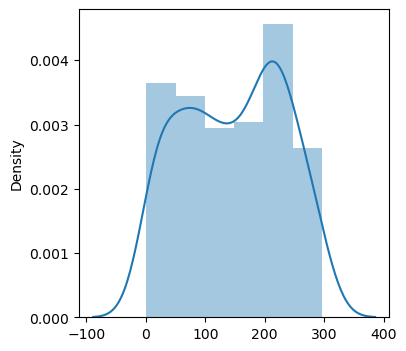

C:\Users\PRAFULL\AppData\Local\Temp\ipykernel_18148\604264494.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data[i])


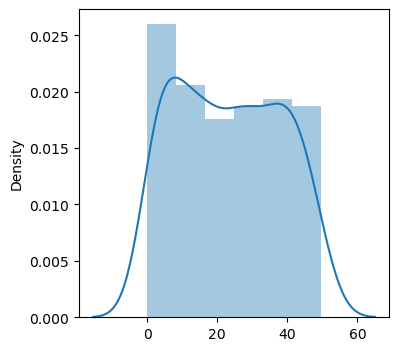

C:\Users\PRAFULL\AppData\Local\Temp\ipykernel_18148\604264494.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data[i])


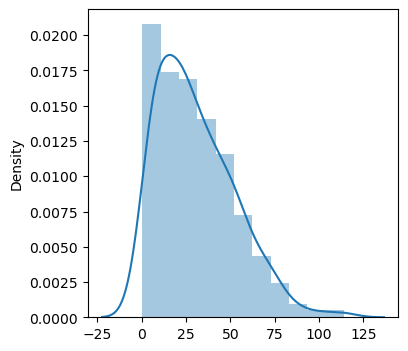

C:\Users\PRAFULL\AppData\Local\Temp\ipykernel_18148\604264494.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data[i])


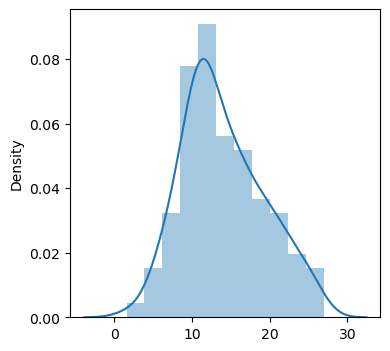

In [24]:
plt.rcParams["figure.figsize"]=(4,4)
for i in data.columns:
    sns.distplot(x=data[i])
    plt.show()

In [25]:
# lets find the outliars in the data

<Axes: >

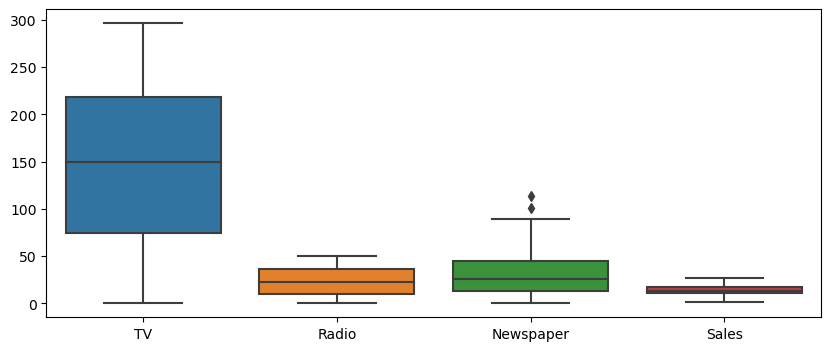

In [26]:
plt.rcParams["figure.figsize"]=(10,4)
sns.boxplot(data)

In [27]:
#lets remove the outliars

In [28]:
from scipy.stats import zscore
threshold=3
z=np.abs(zscore(data))
np.where(z>3)


(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [29]:
data=data[(z<3).all(axis=1)]

In [30]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [31]:
# now split data for training and testing part

In [32]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0,shuffle=True)

In [34]:
# now scale data for standardization

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [36]:
# lets import linear regression

In [37]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()

In [38]:
model=lnr.fit(x_train,y_train)

In [39]:
# lets chech accuracy

In [40]:
from sklearn.metrics import r2_score

In [41]:
# lets check the accuracy of training data

In [42]:
predict=model.predict(x_train)

In [43]:
print("accuracy of of model on training data is: ",r2_score(y_train,predict)*100)

accuracy of of model on training data is:  88.478573868344


In [44]:
# lets check the accuracy of testing data

In [45]:
pred2=model.predict(x_test)

In [46]:
print("accuracy of of model on testing data is: ",r2_score(y_test,pred2)*100)

accuracy of of model on testing data is:  90.72484063007155


In [47]:
#lets dump model

In [48]:
import pickle
with open("ad_predict.pkl","wb") as file_data:
    pickle.dump(lnr,file_data)

In [49]:
# lets test on manual data

In [50]:
regressor=pickle.load(open("ad_predict.pkl","rb"))

In [51]:
predict_data=np.array([55,0,40]).reshape(1,-1)
prediction=regressor.predict(predict_data)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [52]:
print(prediction)

[5.68615768]
